### This notebook was used to generate the plots in the report

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DatasetGeneratorsVF as DG
from sklearn.svm import SVC
from matplotlib import cm
import FrameworkFunctionsVF as FF

In [2]:
import csv

def LoadArray(fileName):
    data = []
    file = open(fileName)
    csvreader = csv.reader(file)
    for row in csvreader:
        data.append([float(i) for i in row])

    return np.array(data)

In [3]:
# Plot styling settings
plt.rcParams.update({'font.family':'serif'})
plt.rcParams.update({'font.serif':'Times New Roman'})
plt.style.use('seaborn')
FONTSIZE = 20

In [4]:
# Paramters consistent for most of the plots
RANDOM_STATE = 1000

f1_b = [-6,6]
f2_b = [-6,6]

In [5]:
# Grid for decision boundaries
x = np.linspace(f1_b[0], f1_b[1], 100)
y = np.linspace(f2_b[0], f2_b[1], 100)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T

In [6]:
# Loading Test Sets
S1TestX = LoadArray("Results/Shape1/TestSet/TestX.csv")
S1TestY = LoadArray("Results/Shape1/TestSet/TestY.csv")
S2TestX = LoadArray("Results/Shape2/TestSet/TestX.csv")
S2TestY = LoadArray("Results/Shape2/TestSet/TestY.csv")

In [7]:
# Loading Unbiased Traning Sets
S1UnbiasedX = LoadArray("Results/Shape1/RANDOMSTATE1000/UnbiasedTrainingSet/UnbiasedX.csv")
S1UnbiasedY = LoadArray("Results/Shape1/RANDOMSTATE1000/UnbiasedTrainingSet/UnbiasedY.csv")
S2UnbiasedX = LoadArray("Results/Shape2/RANDOMSTATE1000/UnbiasedTrainingSet/UnbiasedX.csv")
S2UnbiasedY = LoadArray("Results/Shape2/RANDOMSTATE1000/UnbiasedTrainingSet/UnbiasedY.csv")

S1UnbiasedY = S1UnbiasedY.ravel()
S1TestY = S1TestY.ravel()
S2UnbiasedY = S2UnbiasedY.ravel()
S2TestY = S2TestY.ravel()

In [ ]:
# Figure 1

# Train
clf = SVC(kernel = 'linear', random_state = RANDOM_STATE)
clf.fit(S2UnbiasedX,S2UnbiasedY)
clfAcc = clf.score(S2TestX,S2TestY)
P = clf.decision_function(xy).reshape(X.shape)

fig, axs = plt.subplots(figsize=(10,10))
axs.contour(X, Y, P, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
axs.text(-4.0, -4.5, "Linear SVM Accuracy on unbiased testing set: {:.2%}".format(clfAcc),
            bbox=dict(facecolor='white'), fontsize = 16)
axs.scatter(S2UnbiasedX[S2UnbiasedY == 1,0],S2UnbiasedX[S2UnbiasedY == 1,1], label = "1")
axs.scatter(S2UnbiasedX[S2UnbiasedY == 0,0],S2UnbiasedX[S2UnbiasedY == 0,1], label = '0')
axs.set_xlabel("F1", fontsize = FONTSIZE)
axs.set_ylabel("F2", fontsize = FONTSIZE)
axs.tick_params(labelsize=FONTSIZE)
axs.legend(fontsize = FONTSIZE)
axs.set_xlim(f1_b)
axs.set_ylim(f2_b)
plt.tight_layout()
plt.savefig('ReportPlots/Fig1.svg',format = 'svg')

In [ ]:
# Figure 2

bb = np.linspace(45,360,8)
FONTSIZE = 30
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (40,20))
prob = 0.05 # probability remains in dataset
planeCentre = np.array([1.5,0])
DSTrain0 = S2UnbiasedX[S2UnbiasedY == 0,:]

for i in range(len(bb)):

    # Generate Biased Training Set
    alpha = -np.radians(bb[i]) # plane rotation in degrees
    DSTrain1, plane = DG.KathBiasPlane2D(S2UnbiasedX[S2UnbiasedY == 1,:], alpha, planeCentre, prob, RANDOM_STATE)

    TrainX = np.vstack((DSTrain1,DSTrain0))
    TrainY = np.hstack((np.ones((np.shape(DSTrain1)[0])),np.zeros((np.shape(DSTrain0)[0]))))

    #Train classifier on biased training set
    clf = SVC(kernel = 'linear', random_state = RANDOM_STATE)
    clf.fit(TrainX,TrainY)
    clfAcc = clf.score(S2TestX,S2TestY)

    # Visualise
    ## Plotting Decision Boundary ##
    # https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
    # create grid to evaluate model
    x = np.linspace(f1_b[0], f1_b[1], 100)
    y = np.linspace(f2_b[0], f2_b[1], 100)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    axs[int(i/4),i%4].contour(X, Y, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    axs[int(i/4),i%4].text(-4.5, -4.5, "SVM accuracy on test set: {:.2%}".format(clfAcc),
                bbox=dict(facecolor='white'), fontsize = FONTSIZE)
                
    axs[int(i/4),i%4].scatter(DSTrain1[:,0],DSTrain1[:,1], label = "1")
    axs[int(i/4),i%4].scatter(DSTrain0[:,0],DSTrain0[:,1], label = '0')
    axs[int(i/4),i%4].set_xlabel("F1", fontsize = FONTSIZE)
    axs[int(i/4),i%4].set_ylabel("F2", fontsize = FONTSIZE)
    axs[int(i/4),i%4].set_title(r"$\alpha$ = {:.2f}".format(bb[i]), fontsize = FONTSIZE)
    axs[int(i/4),i%4].tick_params(labelsize=FONTSIZE)
    axs[int(i/4),i%4].legend(fontsize = FONTSIZE)
    axs[int(i/4),i%4].set_xlim(f1_b)
    axs[int(i/4),i%4].set_ylim(f2_b)
    
plt.tight_layout()
plt.savefig('ReportPlots/Fig2.svg',format = 'svg')

In [ ]:
# Figure 4
FONTSIZE = 20
# Train
clfS2 = SVC(kernel = 'linear', random_state = RANDOM_STATE)
clfS2.fit(S2UnbiasedX,S2UnbiasedY)
clfS2Acc = clfS2.score(S2TestX,S2TestY)
PS2 = clfS2.decision_function(xy).reshape(X.shape)

clfS1 = SVC(kernel = 'linear', random_state = RANDOM_STATE)
clfS1.fit(S1UnbiasedX,S1UnbiasedY)
clfS1Acc = clfS1.score(S1TestX,S1TestY)
PS1 = clfS1.decision_function(xy).reshape(X.shape)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

axs[0].contour(X, Y, PS1, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
axs[0].text(-4.0, -4.5, "Linear SVM Accuracy on unbiased testing set: {:.2%}".format(clfS1Acc),
            bbox=dict(facecolor='white'), fontsize = 16)
axs[0].scatter(S1UnbiasedX[S1UnbiasedY == 1,0],S1UnbiasedX[S1UnbiasedY == 1,1], label = "1")
axs[0].scatter(S1UnbiasedX[S1UnbiasedY == 0,0],S1UnbiasedX[S1UnbiasedY == 0,1], label = '0')
axs[0].set_xlabel("F1", fontsize = FONTSIZE)
axs[0].set_ylabel("F2", fontsize = FONTSIZE)
axs[0].set_title("Shape 1", fontsize = FONTSIZE)
axs[0].tick_params(labelsize=FONTSIZE)
axs[0].legend(fontsize = FONTSIZE)
axs[0].set_xlim(f1_b)
axs[0].set_ylim(f2_b)

axs[1].contour(X, Y, PS2, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
axs[1].text(-4.0, -4.5, "Linear SVM Accuracy on unbiased testing set: {:.2%}".format(clfS2Acc),
            bbox=dict(facecolor='white'), fontsize = 16)
axs[1].scatter(S2UnbiasedX[S2UnbiasedY == 1,0],S2UnbiasedX[S2UnbiasedY == 1,1], label = "1")
axs[1].scatter(S2UnbiasedX[S2UnbiasedY == 0,0],S2UnbiasedX[S2UnbiasedY == 0,1], label = '0')
axs[1].set_xlabel("F1", fontsize = FONTSIZE)
axs[1].set_ylabel("F2", fontsize = FONTSIZE)
axs[1].set_title("Shape 2", fontsize = FONTSIZE)
axs[1].tick_params(labelsize=FONTSIZE)
axs[1].legend(fontsize = FONTSIZE)
axs[1].set_xlim(f1_b)
axs[1].set_ylim(f2_b)

fig.suptitle("Unbiased Training Sets",fontsize = FONTSIZE+10)
plt.tight_layout()
plt.savefig('ReportPlots/Fig4.svg',format = 'svg')

In [ ]:
# Figure 6

LINEWIDTH = 6

# alpha = 315 for shape 2
S2reg04acc = LoadArray('Results/Shape2/RANDOMSTATE1000/to_prm_0point4/alpha315/AccArray.csv').ravel()*100
S2reg08acc = LoadArray('Results/Shape2/RANDOMSTATE1000/to_prm_0point8/alpha315/AccArray.csv').ravel()*100
S2Uncertaintyacc = LoadArray('Results/Shape2/RANDOMSTATE1000/UncertaintySampling/alpha315/AccArray.csv').ravel()*100
S2RandomIdealacc = LoadArray('Results/Shape2/RANDOMSTATE1000/RandomIdealSampling/alpha315/AccArray.csv').ravel()*100

# alpha = 270 for shape 1
S1reg04acc = LoadArray('Results/Shape1/RANDOMSTATE1000/to_prm_0point4/alpha270/AccArray.csv').ravel()*100
S1reg08acc = LoadArray('Results/Shape1/RANDOMSTATE1000/to_prm_0point8/alpha270/AccArray.csv').ravel()*100
S1Uncertaintyacc = LoadArray('Results/Shape1/RANDOMSTATE1000/UncertaintySampling/alpha270/AccArray.csv').ravel()*100
S1RandomIdealacc = LoadArray('Results/Shape1/RANDOMSTATE1000/RandomIdealSampling/alpha270/AccArray.csv').ravel()*100

FONTSIZE = 20

n = np.linspace(0,len(S2reg04acc) - 1,len(S2reg04acc))

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

axs[0].plot(n,S1reg04acc, label = r'ALPADR $\alpha = 0.4$', linewidth = LINEWIDTH)
axs[0].plot(n,S1reg08acc, label = r'ALPADR $\alpha = 0.8$', linewidth = LINEWIDTH)
axs[0].plot(n,S1Uncertaintyacc, label = 'Uncertainty Sampling', linewidth = LINEWIDTH)
axs[0].plot(n,S1RandomIdealacc, label = r'Random Ideal Sampling', linewidth = LINEWIDTH )
axs[0].legend(fontsize = FONTSIZE)
axs[0].set_ylabel("Accuracy (%)", fontsize = FONTSIZE)
axs[0].set_xlabel("Number of Iterations", fontsize = FONTSIZE)
axs[0].set_title("Shape 1", fontsize = FONTSIZE)
axs[0].tick_params(labelsize=FONTSIZE)

axs[1].plot(n,S2reg04acc, label = r'ALPADR $\alpha = 0.4$', linewidth = LINEWIDTH)
axs[1].plot(n,S2reg08acc, label = r'ALPADR $\alpha = 0.8$', linewidth = LINEWIDTH)
axs[1].plot(n,S2Uncertaintyacc, label = 'Uncertainty Sampling', linewidth = LINEWIDTH)
axs[1].plot(n,S2RandomIdealacc, label = r'Random Ideal Sampling', linewidth = LINEWIDTH)
# axs[1].legend(fontsize = FONTSIZE)
axs[1].set_ylabel("Accuracy (%)", fontsize = FONTSIZE)
axs[1].set_xlabel("Number of Iterations", fontsize = FONTSIZE)
axs[1].set_title("Shape 2", fontsize = FONTSIZE)
axs[1].tick_params(labelsize=FONTSIZE)

fig.suptitle("ALPADR Comparisons with Baselines",fontsize = FONTSIZE + 10)

plt.tight_layout()
plt.savefig('ReportPlots/Fig6.svg',format = 'svg')


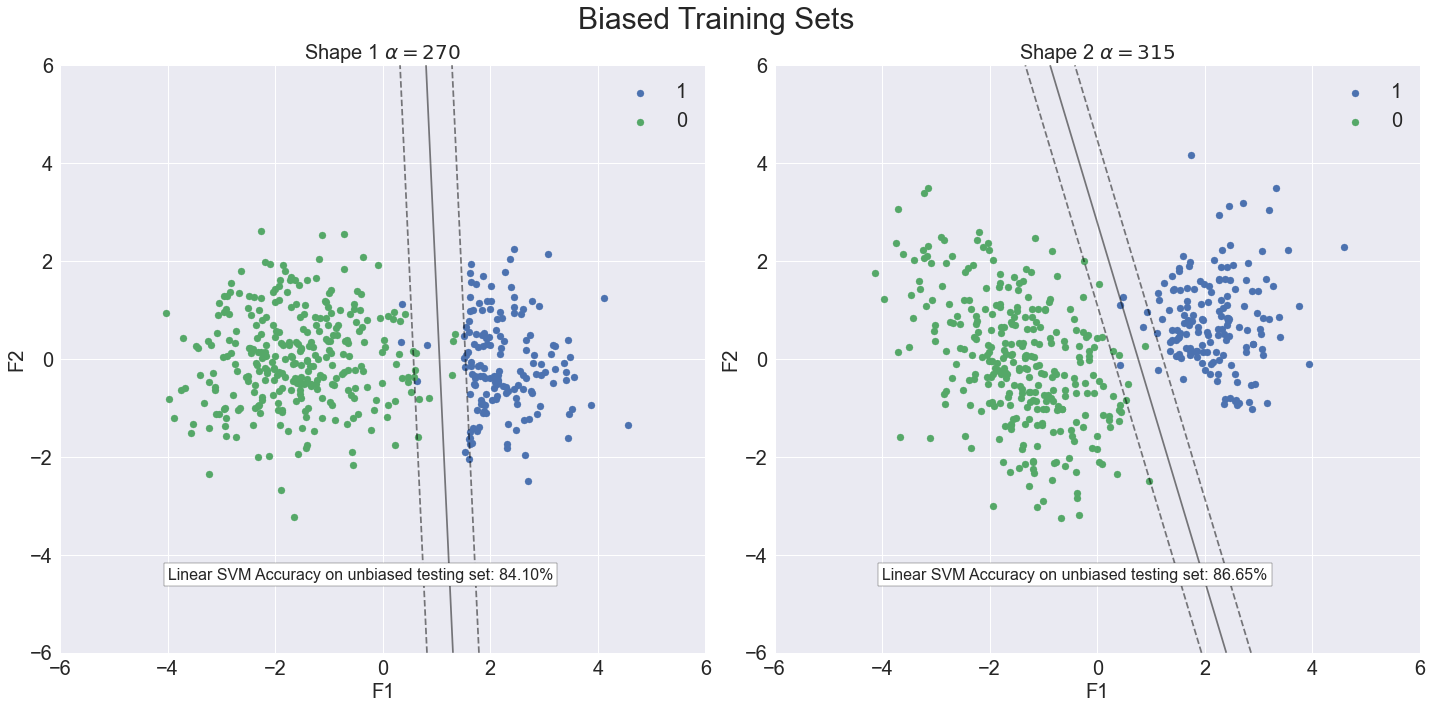

In [14]:
# Figure 5 

S1BiasedX = LoadArray("Results/Shape1/RANDOMSTATE1000/to_prm_0point4/alpha270/Dataset/BiasedX_Iteration0.csv")
S1BiasedY = LoadArray("Results/Shape1/RANDOMSTATE1000/to_prm_0point4/alpha270/Dataset/BiasedY_Iteration0.csv").ravel()
S2BiasedX = LoadArray("Results/Shape2/RANDOMSTATE1000/to_prm_0point4/alpha315/Dataset/BiasedX_Iteration0.csv")
S2BiasedY = LoadArray("Results/Shape2/RANDOMSTATE1000/to_prm_0point4/alpha315/Dataset/BiasedY_Iteration0.csv").ravel()

# Train
clfBS2 = SVC(kernel = 'linear', random_state = RANDOM_STATE)
clfBS2.fit(S2BiasedX,S2BiasedY)
clfBS2Acc = clfBS2.score(S2TestX,S2TestY)
PS2 = clfBS2.decision_function(xy).reshape(X.shape)

clfBS1 = SVC(kernel = 'linear', random_state = RANDOM_STATE)
clfBS1.fit(S1BiasedX,S1BiasedY)
clfBS1Acc = clfBS1.score(S1TestX,S1TestY)
PS1 = clfBS1.decision_function(xy).reshape(X.shape)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

axs[0].contour(X, Y, PS1, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
axs[0].text(-4.0, -4.5, "Linear SVM Accuracy on unbiased testing set: {:.2%}".format(clfBS1Acc),
            bbox=dict(facecolor='white'), fontsize = 16)
axs[0].scatter(S1BiasedX[S1BiasedY == 1,0],S1BiasedX[S1BiasedY == 1,1], label = "1")
axs[0].scatter(S1BiasedX[S1BiasedY == 0,0],S1BiasedX[S1BiasedY == 0,1], label = '0')
axs[0].set_xlabel("F1", fontsize = FONTSIZE)
axs[0].set_ylabel("F2", fontsize = FONTSIZE)
axs[0].set_title(r"Shape 1 $\alpha = 270$", fontsize = FONTSIZE)
axs[0].tick_params(labelsize=FONTSIZE)
axs[0].legend(fontsize = FONTSIZE)
axs[0].set_xlim(f1_b)
axs[0].set_ylim(f2_b)

axs[1].contour(X, Y, PS2, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
axs[1].text(-4.0, -4.5, "Linear SVM Accuracy on unbiased testing set: {:.2%}".format(clfBS2Acc),
            bbox=dict(facecolor='white'), fontsize = 16)
axs[1].scatter(S2BiasedX[S2BiasedY == 1,0],S2BiasedX[S2BiasedY == 1,1], label = "1")
axs[1].scatter(S2BiasedX[S2BiasedY == 0,0],S2BiasedX[S2BiasedY == 0,1], label = '0')
axs[1].set_xlabel("F1", fontsize = FONTSIZE)
axs[1].set_ylabel("F2", fontsize = FONTSIZE)
axs[1].set_title(r"Shape 2 $\alpha = 315$", fontsize = FONTSIZE)
axs[1].tick_params(labelsize=FONTSIZE)
axs[1].legend(fontsize = FONTSIZE)
axs[1].set_xlim(f1_b)
axs[1].set_ylim(f2_b)

fig.suptitle("Biased Training Sets",fontsize = FONTSIZE+10)
plt.tight_layout()
plt.savefig('ReportPlots/Fig5.svg',format = 'svg')
